In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_excel(r"C:\Users\Rakesh Lodem\Downloads\train.xlsx","train")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [7]:
test=pd.read_excel(r"C:\Users\Rakesh Lodem\Downloads\test.xlsx","test")

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [9]:
print(train.shape)
print(test.shape)

(1168, 81)
(292, 80)


In [10]:
## DATA CLEANING

In [11]:
train.isnull().sum().sum()

5558

In [12]:
train.isnull().sum()[0:40]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [13]:
train.isnull().sum()[40:81]

HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       551
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

<AxesSubplot:>

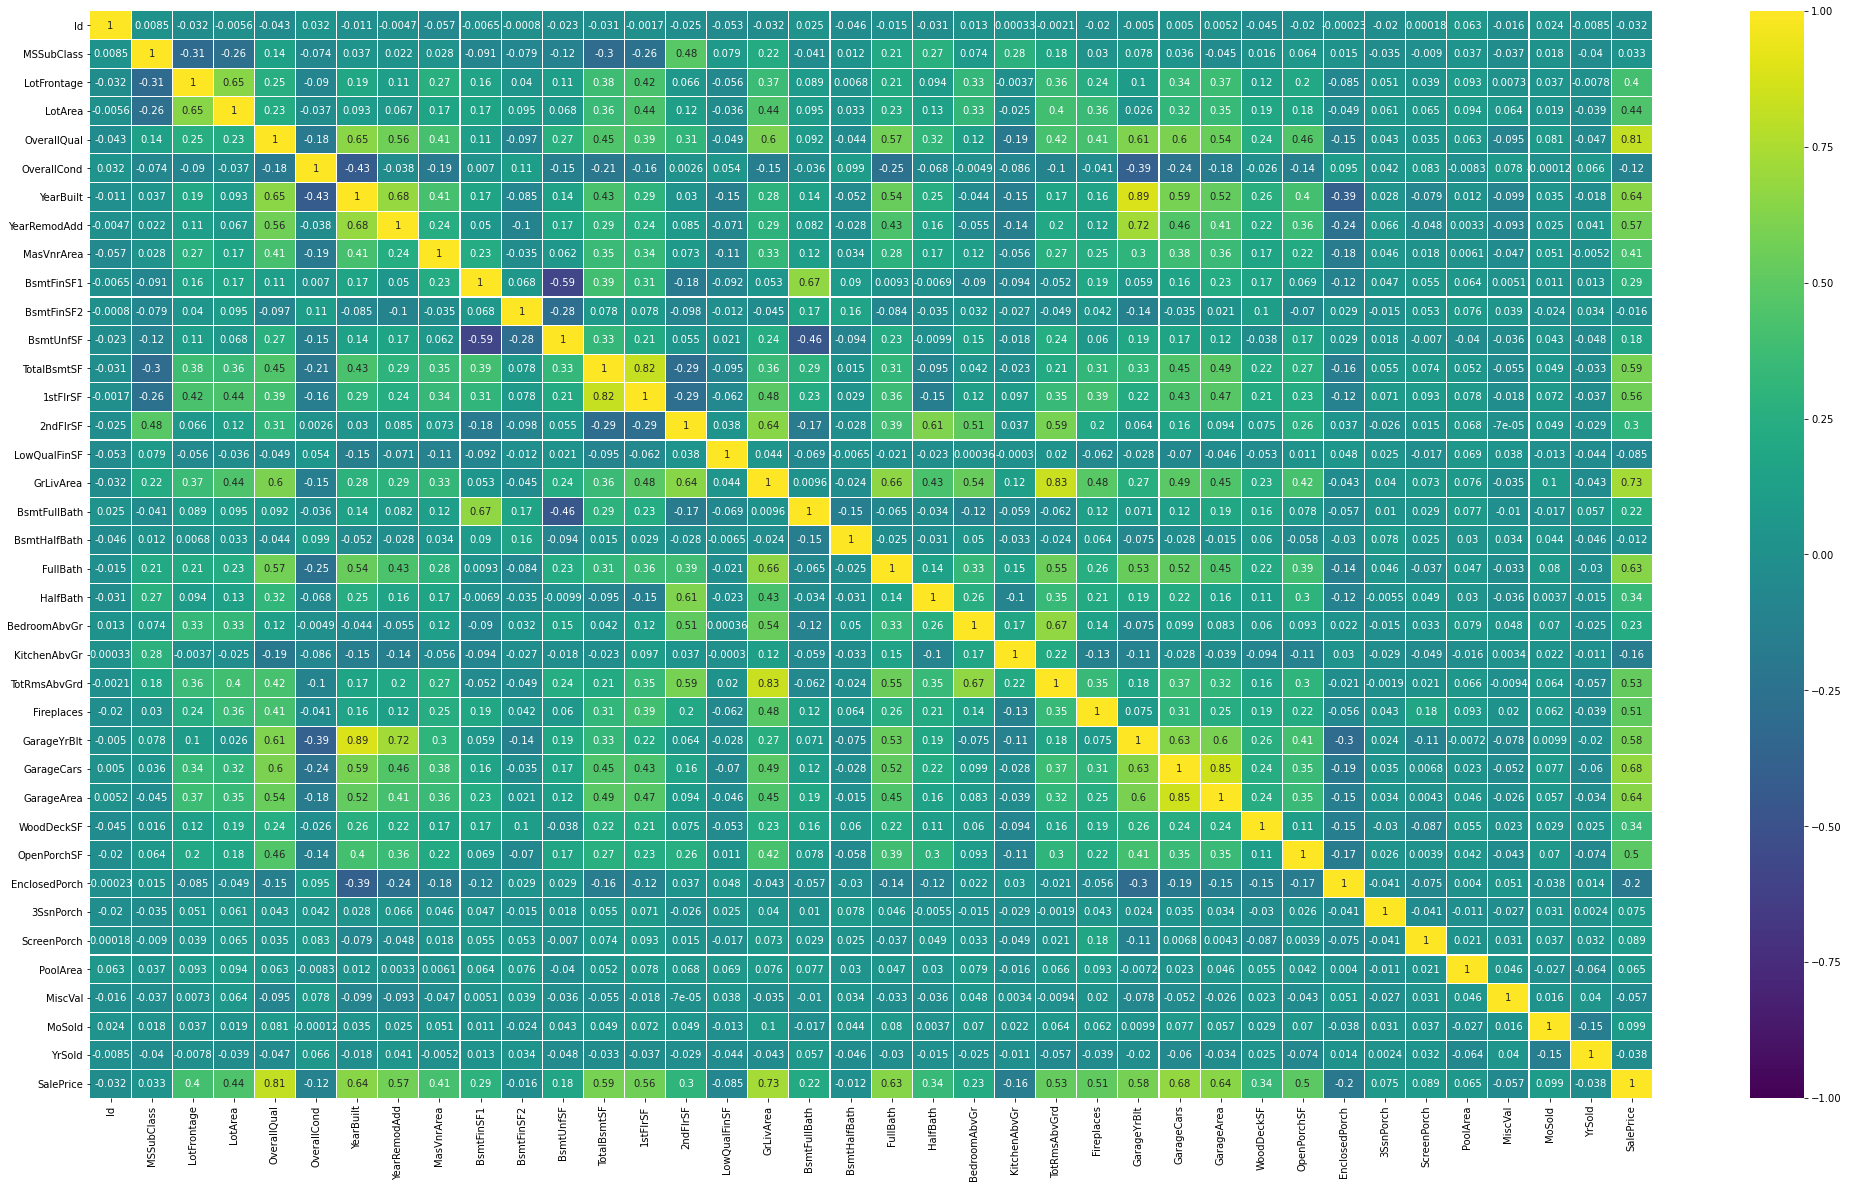

In [14]:
# Checking correlation between columns 
train_corr = train.corr(method="spearman")
plt.figure(figsize=(35,20))
sns.heatmap(train_corr, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [15]:
# Selecting features with correlation above 50% with target variable
main_features = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea']

In [16]:
train_new = train[main_features]

In [17]:
train_new.isnull().sum().sum()

0

In [18]:
test_new = test[main_features]

In [19]:
test_new.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
dtype: int64

In [20]:
test_new["TotalBsmtSF"].fillna(value=test_new["TotalBsmtSF"].mean(), axis=0, inplace=True )
test_new["GarageCars"].fillna(value=test_new["GarageCars"].mean(), axis=0, inplace = True)
test_new["GarageArea"].fillna(value=test_new["GarageArea"].mean(), axis=0, inplace = True)

In [21]:
test_new.isnull().sum().sum()


0

In [22]:
## DATA VISULAIZATION

No handles with labels found to put in legend.


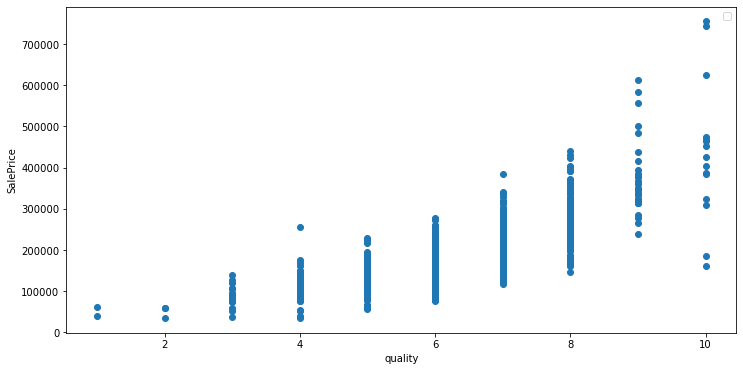

In [23]:
# Scatter plot b/w OverallQual and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["OverallQual"] ,train["SalePrice"])
plt.xlabel("quality")
plt.ylabel("SalePrice")
plt.legend()
plt.show() 

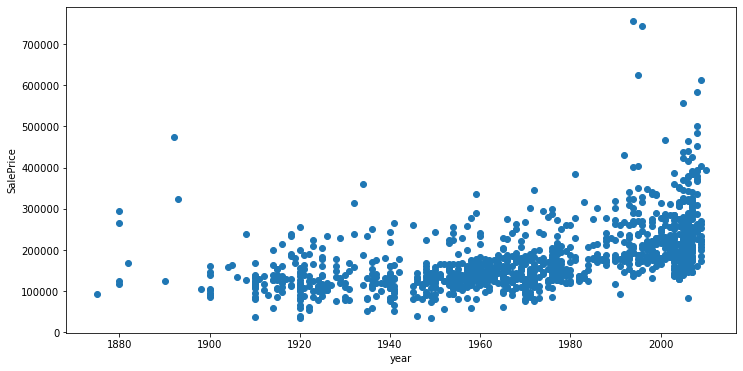

In [24]:
# Scatter plot b/w YearBuilt and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["YearBuilt"] ,train["SalePrice"])
plt.xlabel("year")
plt.ylabel("SalePrice")
plt.show() 

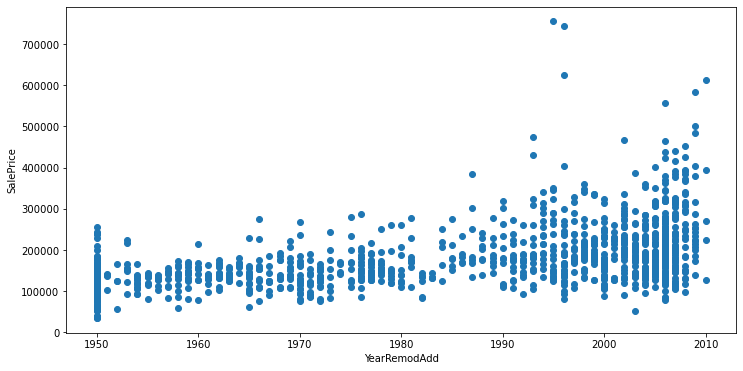

In [25]:
# Scatter plot b/w YearRemodAdd and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["YearRemodAdd"] ,train["SalePrice"])
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show() 

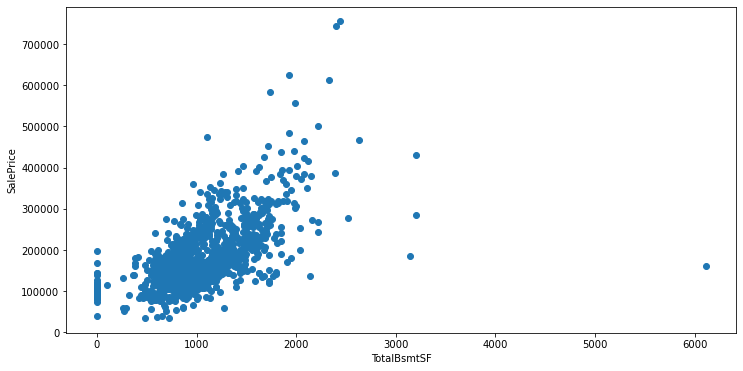

In [26]:
# Scatter plot b/w TotalBsmtSF and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["TotalBsmtSF"] ,train["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show() 

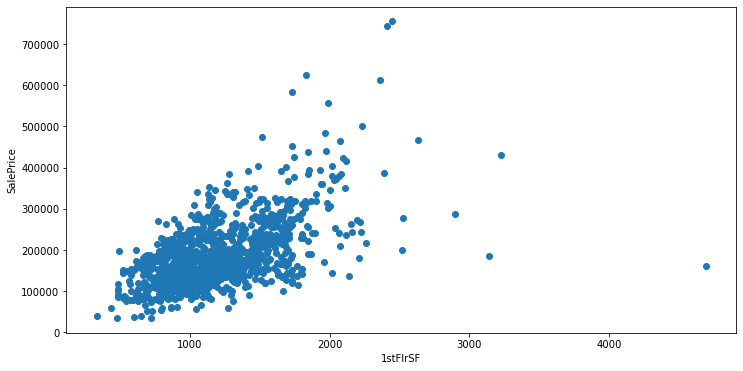

In [27]:
# Scatter plot b/w 1stFlrSF and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["1stFlrSF"] ,train["SalePrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show() 

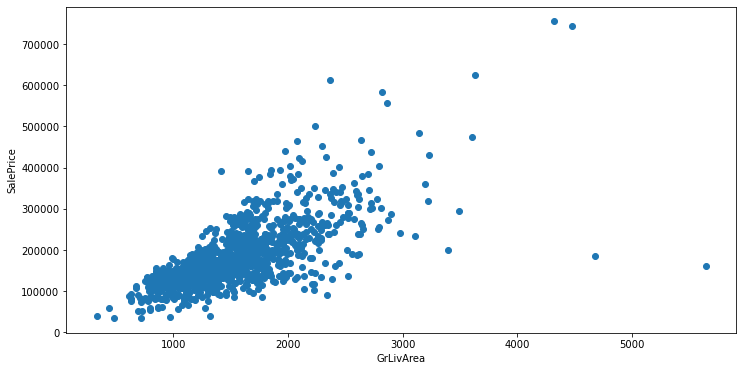

In [28]:
# Scatter plot b/w GrLivArea and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["GrLivArea"] ,train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

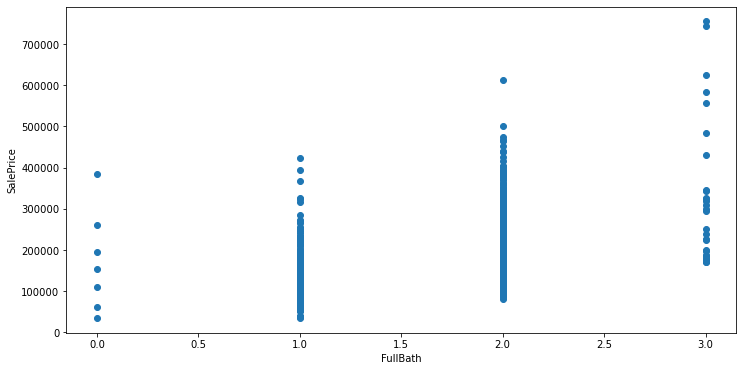

In [29]:
# Scatter plot b/w FullBath and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["FullBath"] ,train["SalePrice"])
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.show()

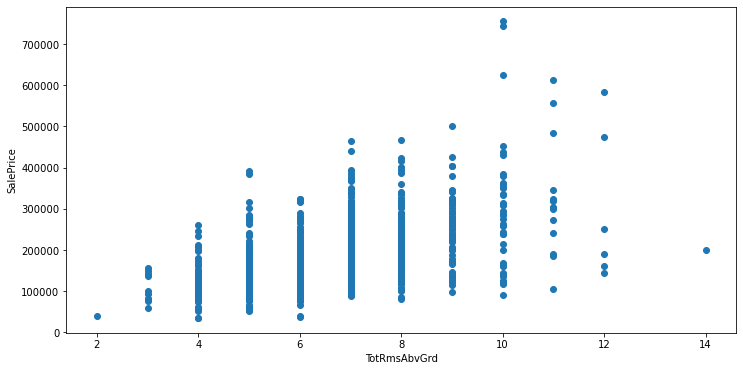

In [30]:
# Scatter plot b/w TotRmsAbvGrd and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["TotRmsAbvGrd"] ,train["SalePrice"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show() 

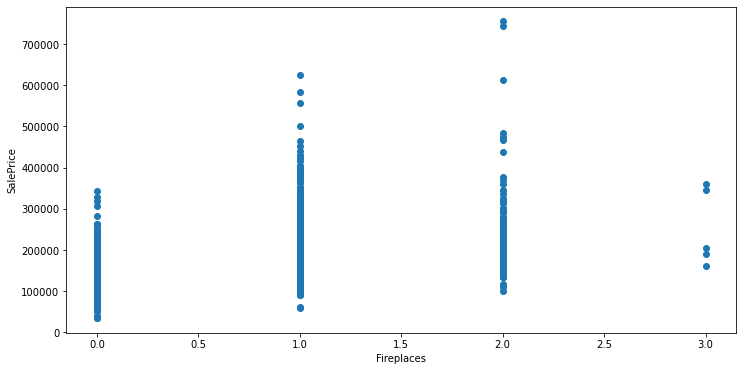

In [31]:
# Scatter plot b/w Fireplaces and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["Fireplaces"] ,train["SalePrice"])
plt.xlabel("Fireplaces")
plt.ylabel("SalePrice")
plt.show() 

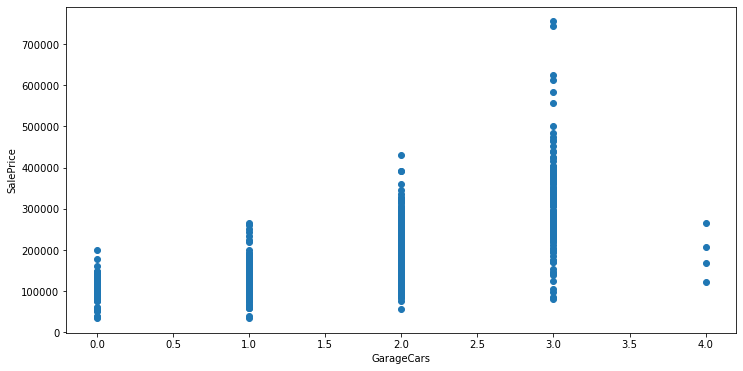

In [32]:
# Scatter plot b/w GarageCars and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["GarageCars"] ,train["SalePrice"])
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show() 

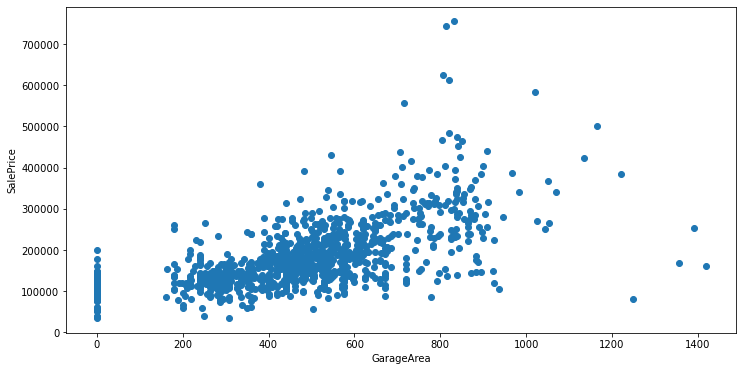

In [33]:
# Scatter plot b/w GarageArea and SalePrice
plt.figure(figsize=(12,6))
plt.scatter(train["GarageArea"] ,train["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show() 

In [34]:
## MODELING

In [35]:
X=train_new
y=train['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(len(X_train),len(X_test),len(y_train),len(y_test))

817 351 817 351


In [37]:
## LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.754262299547903

In [ ]:
## RANDOMFOREST REGRESSOR

In [41]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
RandomForestRegressor()
prediction1 = model1.predict(X_test)
model1.score(X_test,y_test)

0.7821293094419525

In [43]:
## DECISION TREE REGRESSOR

In [44]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
DecisionTreeRegressor()
prediction2 = model2.predict(X_test)
model2.score(X_test,y_test)

0.6426899880475724

In [45]:
## KNEIGHBORS REGRESSOR

In [46]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
model3.fit(X_train,y_train)
KNeighborsRegressor()
prediction3 = model3.predict(X_test)
model3.score(X_test, y_test)

0.689453219430473

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
## HYPER PARAMETER TUNING

In [49]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]}

In [51]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)

In [53]:
g.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15, 20, 25, 30,
                                                      35, 40],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [54]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=40, min_samples_leaf=3)
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 40}
0.8124369104270379


In [56]:
from sklearn.model_selection import cross_val_score

In [59]:
m=RandomForestRegressor(max_depth=40, min_samples_leaf=3, min_samples_split=2,n_estimators=100)
m.fit(X_train,y_train)
p=m.predict(X_test)
score=cross_val_score(m,X,y,cv=10)

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
m.score(X_test,y_test)

0.8007393698118116